In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

## Load the clean trees data from saved pickle into the `trees` dataframe

In [3]:
df = pd.read_pickle("../data/pickle/trees_first_clean.pkl")

List first 5 elements of the dataframe

In [4]:
df.head(5)

,ELEM_POINT_ID,CODE,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,CODE_PARENT_DESC,ADR_SECTEUR,GENRE_BOTA,ESPECE,VARIETE,STADEDEDEVELOPPEMENT,ANNEEDEPLANTATION,COLLECTIVITE,type,longitude,latitude
0,32215,ESP32919,ESP151,Arbre de voirie,ESP32840,Crs Jaurès impair de PHD/ Lorr,2,Platanus,platanor,Vallis clausa,Arbre jeune,2014.0,Grenoble Alpes Métropole,Point,5.719919,45.190237
1,32214,ESP32918,ESP151,Arbre de voirie,ESP32840,Crs Jaurès impair de PHD/ Lorr,2,Tilia,mongolica,NaN,Arbre jeune,2014.0,Grenoble Alpes Métropole,Point,5.719994,45.190280
2,32213,ESP32917,ESP151,Arbre de voirie,ESP32840,Crs Jaurès impair de PHD/ Lorr,2,Malus,perpetu,Evereste,Arbre jeune,2014.0,Grenoble Alpes Métropole,Point,5.720006,45.190322
3,32212,ESP32916,ESP151,Arbre de voirie,ESP32840,Crs Jaurès impair de PHD/ Lorr,2,Platanus,platanor,Vallis clausa,Arbre jeune,2014.0,Grenoble Alpes Métropole,Point,5.719959,45.190359
4,32211,ESP32915,ESP151,Arbre de voirie,ESP32840,Crs Jaurès impair de PHD/ Lorr,2,Tilia,mongolica,NaN,Arbre jeune,2014.0,Grenoble Alpes Métropole,Point,5.720047,45.190442


List the columns of the dataframe

In [5]:
df.columns

Index(['ELEM_POINT_ID', 'CODE', 'SOUS_CATEGORIE', 'SOUS_CATEGORIE_DESC',
       'CODE_PARENT', 'CODE_PARENT_DESC', 'ADR_SECTEUR', 'GENRE_BOTA',
       'ESPECE', 'VARIETE', 'STADEDEDEVELOPPEMENT', 'ANNEEDEPLANTATION',
       'COLLECTIVITE', 'type', 'longitude', 'latitude'],
      dtype='object')

In [6]:
df.shape

(31400, 16)

# Make train test split

#### Random split

Import `train_test_split` from scikit-learn.

In [7]:
from sklearn.model_selection import train_test_split

In the following we want to build a machine learning model that helps us predict the plantation year for different trees based on their characteristics.

For this you have to first remove the column `ANNEEDEPLANTATION` from the dataframe and save the result in the variable `year`. Hint: use `pop`

In [8]:
year = df.pop("ANNEEDEPLANTATION")

In [9]:
df.columns

Index(['ELEM_POINT_ID', 'CODE', 'SOUS_CATEGORIE', 'SOUS_CATEGORIE_DESC',
       'CODE_PARENT', 'CODE_PARENT_DESC', 'ADR_SECTEUR', 'GENRE_BOTA',
       'ESPECE', 'VARIETE', 'STADEDEDEVELOPPEMENT', 'COLLECTIVITE', 'type',
       'longitude', 'latitude'],
      dtype='object')

Split the `trees` and the `year` data into train and test partitions. Use seed=800.

You must save the result in 4 variables: X_train (instances in the train set), X_test (instances in the test set), y_train (labels corresponding to the instances in the train set), y_test (labels corresponding to the instances in the test set).

For clarifications, read the `train_test_split` documentation.

In [10]:
x_train,x_test,y_train,y_test = train_test_split(df,year,random_state=800)

How many instanes are there in the train set?

In [11]:
x_train.shape

(23550, 15)

In [12]:
y_train.shape

(23550,)

How many instances are there in the test set?

In [13]:
x_test.shape

(7850, 15)

# Basic stats

Display basic statistics on the train data (count, mean, std, etc.) - do it in one line! 

In [14]:
y_train.describe()

count    23550.000000
mean      1989.195414
std         17.070186
min       1924.000000
25%       1975.000000
50%       1985.000000
75%       2004.000000
max       2019.000000
Name: ANNEEDEPLANTATION, dtype: float64

In [15]:
x_train.describe()

,ELEM_POINT_ID,ADR_SECTEUR,longitude,latitude
count,23550.000000,23550.000000,23550.000000,23550.000000
mean,18363.025520,3.859830,5.727327,45.176859
std,11045.924091,1.697496,0.012859,0.011904
min,1.000000,1.000000,5.697915,45.151572
25%,8958.250000,2.000000,5.717535,45.165925
50%,17889.500000,4.000000,5.729574,45.175541
75%,27029.750000,5.000000,5.737341,45.186669
max,43041.000000,6.000000,5.798704,45.224825


Display basic statistics on the test data (count, mean, std, etc.) - do it in one line! 

In [16]:
y_test.describe()

count    7850.000000
mean     1989.099745
std        17.129787
min      1924.000000
25%      1975.000000
50%      1985.000000
75%      2003.000000
max      2019.000000
Name: ANNEEDEPLANTATION, dtype: float64

Display the distribution of the labels in the train set using a histogram with 50 bins. Do not call matplotlib explicitly.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0dd0f3fed0>,
      dtype=object)

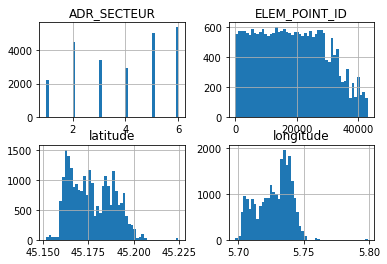

In [17]:
x_train.hist(bins=50)

Display the distribution of the data in different columns of the train set using a histogram default number of bins. Do not call matplotlib explicitly and do it in one line!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0dd01144d0>,
      dtype=object)

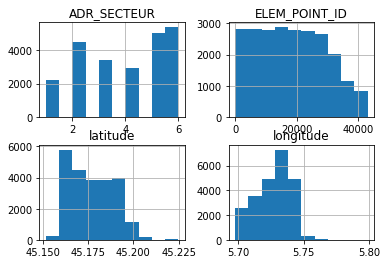

In [18]:
x_train.hist()

Display the number of missing values for each column in the dataframe.

In [19]:
x_train.isna().sum()

ELEM_POINT_ID               0
CODE                        0
SOUS_CATEGORIE              0
SOUS_CATEGORIE_DESC         0
CODE_PARENT                 0
CODE_PARENT_DESC            0
ADR_SECTEUR                 0
GENRE_BOTA                 29
ESPECE                   1294
VARIETE                 20408
STADEDEDEVELOPPEMENT     1304
COLLECTIVITE                0
type                        0
longitude                   0
latitude                    0
dtype: int64

In [20]:
df.isna().sum()

ELEM_POINT_ID               0
CODE                        0
SOUS_CATEGORIE              0
SOUS_CATEGORIE_DESC         0
CODE_PARENT                 0
CODE_PARENT_DESC            0
ADR_SECTEUR                 0
GENRE_BOTA                 41
ESPECE                   1713
VARIETE                 27186
STADEDEDEVELOPPEMENT     1710
COLLECTIVITE                0
type                        0
longitude                   0
latitude                    0
dtype: int64

# Building a first naive model

We will consider we can determine the plantation year of trees in the test set based solely on the median value of the plantation year for the trees in the train set.

Display the median value of plantation year for trees in the train set.

In [21]:
med = y_test.median()

Display the shape of the test set.

In [22]:
y_test.shape

(7850,)

Create a variable `y_test_pred`. This will serve to store the predictions of your machine learning model on the test set.

It has to be an array of the same length as the number of test examples (in X_test).

Initialize this variable to have the median value from the train set.

In [23]:
y_test_pred = np.full((len(x_test),1),med)

Display the contents of `y_test_pred`

In [24]:
y_test_pred

array([[1985.],
       [1985.],
       [1985.],
       ...,
       [1985.],
       [1985.],
       [1985.]])

Import from the scikit-learn library the necessary function to compute the mean squared error.

In [25]:
from sklearn.metrics import mean_squared_error

Apply the function to compute the error on the test set. Print the result.

In [26]:
mean_squared_error(y_test,y_test_pred)

310.200127388535

# Prepare data and build new models

### 1. Make a processing pipeline using only numerical data

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

Inspect the following code and write what it does the cell below.

In [28]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

it select the values of the dataframe you pass in arguments

Define a `Pipeline` consisting of 3 steps: 
- selecting only the numerical attributes from the dataframe that could make sense for the prediction (longitude and latitude), 
- replacing missing values with the median of each column, 
- normalizing the data (removing the mean and scaling to unit variance).

For this, get help from the scikit learn documentation related to the corresponding functions.
Your code has to be one line!

In [29]:
num_attribs = ['longitude', 'latitude']

# code here
num_pipeline = Pipeline(steps=[('DS',DataFrameSelector(num_attribs)),('SI',SimpleImputer(strategy="median")),("SS",StandardScaler())])

Inspect the longitude and latitude of the first elements in the train set.

In [30]:
df.loc[:,num_attribs].head(5)

,longitude,latitude
0,5.719919,45.190237
1,5.719994,45.190280
2,5.720006,45.190322
3,5.719959,45.190359
4,5.720047,45.190442


Read the documentation for `fit_transform()` if you are unfamiliar with the method.

Apply the `fit_transform()` to the train data and save the result in `X_trainT`. Inspect its shape.

In [31]:
type(num_pipeline)

sklearn.pipeline.Pipeline

In [32]:
X_trainT = num_pipeline.fit_transform(x_train,y_train)

Apply the `transform` to the test data. Save the result in a variable `X_testT` and print it.

In [33]:
X_testT = num_pipeline.transform(x_test)

In [34]:
X_testT

array([[ 1.12904697,  0.01052574],
       [-0.12805059, -0.9080982 ],
       [-1.68527105,  0.00893492],
       ...,
       [-1.32366152, -1.18461785],
       [ 0.68994503,  1.56324796],
       [-1.28927307, -0.87258273]])

What does the above output represent?

it represent the test set after transformations by the pipeline

Repeat the above process by selectively commenting parts of the processing in the `Pipeline` and changing the missing values handling strategy. Observe the results and write down your observations below.

In [35]:
num_pipeline = Pipeline(steps=[('DS',DataFrameSelector(num_attribs)),('SI',SimpleImputer(strategy="mean"))])

num_pipeline.fit_transform(x_train,y_train)

num_pipeline.transform(x_test)

array([[ 5.74184539, 45.17698446],
       [ 5.72568028, 45.16604914],
       [ 5.70565588, 45.17696553],
       ...,
       [ 5.71030584, 45.16275745],
       [ 5.73619894, 45.19546811],
       [ 5.71074804, 45.16647192]])

the transformation change it doesn't apply the missing transformers and apply the mean strategy on the missing values. 

What are `Pipeline`s useful for? Answer below.

pipelines are useful for apply multiple transformations at once

### 2. Start modelling!

Now we can start modelling. We will start with a Linear Regression model.

#### Linear Regression

Import from scikit learn what is necessary to 1)perform linear regression and to 2)compute the cross validation score (`cross_val_score`).


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

Inspect the documentation pages of the above two functions to understand their usage.

To better understand how cross validation works, read the documentation page from scikit learn `3.1. Cross-validation: evaluating estimator performance` up until Section `3.1.1`.

Create a linear regression instance and save it in the `lin_reg` variable below. Build a model on the training set, calling the `fit()` method.

In [37]:
lin_reg = LinearRegression().fit(X_trainT,y_train)

Run 10-fold cross validation with the metric to apply to the estimator (i.e. the scoring function) set to mean squared error.

Print the resulting scores of the cross validation and the descriptive statistics (mean, std, etc.)

In [38]:
result = cross_val_score(lin_reg,X_trainT,y_train,scoring="neg_mean_squared_error",cv=10)

print(result)
print("mean",result.mean(),'std',result.std())

[-280.72074649 -279.307987   -280.35557988 -290.62084636 -278.22450599
 -275.9426281  -285.04108392 -289.78328884 -280.86265765 -290.42591661]
mean -283.1285240835443 std 5.159790415352624


#### Decision Trees

Import from scikit learn what is necessary to build a Decision Trees model for a regression problem.

In [39]:
from sklearn.tree import DecisionTreeRegressor

Create an instance of a `DecisionTreeRegressor` with `random_state=43` and save it in the `tree_reg` variable below. Leave all the other parameters to their default values. Build a model on the training set, calling the `fit()` method.

In [40]:
tree_reg = DecisionTreeRegressor(random_state=43).fit(X_trainT,y_train)

Run 10-fold cross validation with the metric to apply to the estimator (i.e. the scoring function) set to mean squared error.

Print the resulting scores of the cross validation and the descriptive statistics (mean, std, etc.)

In [41]:
result = cross_val_score(tree_reg,X_trainT,y_train,scoring="neg_mean_squared_error",cv=10)

print(result)
print("mean",result.mean(),'std',result.std())

[-153.22972399 -169.94140127 -156.78216561 -147.72951168 -146.4985138
 -175.46666667 -155.85392781 -159.26624204 -172.35201699 -175.75286624]
mean -161.28730360934182 std 10.625334223943456


How are the results obtained using the `DecisionTreeRegressor` in comparison to the results obtained using `LinearRegression` and in comparison to the Naive Model from the beginning of this notebook? 

Write down below the mean squared error value for each of them and your conclusions.

the decision trees model have lesser mean squared error than the linear model and the naive model so it let me think that this model is better estimator than the others

### 3. Alter the hyper-parameters of the model

Previously you called the `DecisionTreeRegressor`function with default parameters.

In the following we will explore running different Decision Tree models with different parameters.

To begin with, inspect the scikit learn page of `DecisionTreeRegressor` to understand which are the possible different hyper-parameters that you can adjust. Call a function to get the parameters of the `DecisionTreeRegressor`, save the result in a variable and display its contents below.


In [42]:
params = tree_reg.get_params()

params

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 43,
 'splitter': 'best'}

Create 10 new instances of a `DecisionTreeRegressor` and save them in 10 different variables, while keeping `random_state=43`. 

For each of them alter the default parameters by inputing different values for each of the following: `min_impurity_decrease`,  `max_depth`, `max_features`. Then, for each of them build a model on the training set, calling the `fit()` method.


In [43]:
import random

In [44]:
tree_regr=[i for i in range(0,10)]

for i in range(0,10):
    tree_regr[i]= DecisionTreeRegressor(random_state=43,min_impurity_decrease=random.randint(0,5),                                               max_depth=random.randint(10,100),max_features=random.randint(1,2))

In [45]:

tree_reg

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=43, splitter='best')

Run 10-fold cross validation with the metric to apply to the estimator (i.e. the scoring function) set to mean squared error.

Print the resulting scores of the cross validation and the descriptive statistics (mean, std, etc.) for all 10 models.


In [46]:
result=[i for i in range(0,10)]


for i in range(0,10):
    result[i] = cross_val_score(tree_regr[i],X_trainT,y_train,scoring="neg_mean_squared_error",cv=10)


In [47]:
for i in range(0,10):
    print(str(i)+"- ","mean : ",result[i].mean(),"std :",result[i].std())
    print(result[i],"\n")


0-  mean :  -262.6736817204781 std : 7.36597495509051
[-256.07178046 -269.28369742 -255.33200322 -262.1632068  -253.43755196
 -264.70885453 -254.68533687 -276.75002356 -269.34519801 -264.95916437] 

1-  mean :  -262.6736817204781 std : 7.36597495509051
[-256.07178046 -269.28369742 -255.33200322 -262.1632068  -253.43755196
 -264.70885453 -254.68533687 -276.75002356 -269.34519801 -264.95916437] 

2-  mean :  -270.3038171483539 std : 4.542262654954264
[-267.91902214 -269.28369742 -267.82179663 -277.6282436  -263.56347631
 -264.70885453 -271.28521795 -276.75002356 -269.34519801 -274.73264133] 

3-  mean :  -262.6736817204781 std : 7.36597495509051
[-256.07178046 -269.28369742 -255.33200322 -262.1632068  -253.43755196
 -264.70885453 -254.68533687 -276.75002356 -269.34519801 -264.95916437] 

4-  mean :  -270.3038171483539 std : 4.542262654954264
[-267.91902214 -269.28369742 -267.82179663 -277.6282436  -263.56347631
 -264.70885453 -271.28521795 -276.75002356 -269.34519801 -274.73264133] 

5- 

How is the performance different for different models? Answer below.

some models have a higher mean squared values but a lesser standard deviation, it depend of the value of the max depth and max features if there is 1 max feature and an average max depth the better the model is 

### 4. Evaluate the models on the test set

Until now you have only investigated the performance (in terms of mean squared error) of the models on the train set. However, in practice we are interested to know how well a model generalizes on unseen data.

Evaluate each of the above models on the test set. Record below the following: 
* model name & parameters
* model score on the train set
* model score on the test set

Rememeber: you had to apply the exact same pre-processing steps for the train and test set: you did this in Section `Make a processing pipeline using only numerical data` and saved the results in `X_trainT` and `X_testT`.

In [48]:
print("Linear regression : \n",lin_reg.get_params(),'\n')

res = cross_val_score(lin_reg,X_trainT,y_train,scoring="neg_mean_squared_error",cv=10)
print("train set : mean",res.mean(),'std : ',res.std(),"\n",res,'\n')

res = cross_val_score(lin_reg,X_testT,y_test,scoring="neg_mean_squared_error",cv=10)
print("test set : mean",res.mean(),'std : ',res.std(),"\n",res,'\n')

print("###############################################################################\n")

print("Decision tree : \n",tree_reg.get_params(),'\n')

res = cross_val_score(tree_reg,X_trainT,y_train,scoring="neg_mean_squared_error",cv=10)
print("train set : mean",res.mean(),'std : ',res.std(),"\n",res,'\n')

res = cross_val_score(tree_reg,X_testT,y_test,scoring="neg_mean_squared_error",cv=10)
print("test set : mean",res.mean(),'std : ',res.std(),"\n",res,'\n')



Linear regression : 
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False} 

train set : mean -283.1285240835443 std :  5.159790415352624 
 [-280.72074649 -279.307987   -280.35557988 -290.62084636 -278.22450599
 -275.9426281  -285.04108392 -289.78328884 -280.86265765 -290.42591661] 

test set : mean -286.03688487239594 std :  5.052121870960434 
 [-282.3813166  -279.49150511 -290.10165597 -293.04972092 -291.14744971
 -289.9698222  -277.36611431 -288.88919232 -284.07601426 -283.89605733] 

###############################################################################

Decision tree : 
 {'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 43, 'splitter': 'best'} 

train set : mean -161.28730360934182 std :  10.625334223943456 
 [-153.22972

on unseen data the models are as expected less efficient, the mean and the standard deviation are higher than the test set 

How do the models compare to each other? Can you observe any overfitting? For which model? Answer below.

on the decision tree model on the train set, the model is too efficient compare to unseen datas so i bet this model is overfitting with the train set 

### 5. Grid search for the best parameters

Previously, you tried several models with different values for different hyper-parameters, by choosing these values manually and evaluating each model individually. However, doing so exhaustically is impossible in practice in a given limited amount of time. 

In the following you will see how you can speed up the process and use a grid search over a set of parameters to find the best ones that fit the train data.

For this, read the documentation for the `GridSearchCV` function in scikit learn. Make the necessary import below.

In [49]:
from sklearn.model_selection import GridSearchCV

Read from scikit learn the documentation page `3.2. Tuning the hyper-parameters of an estimator` to understand the usage of `GridSearchCV`.

Apply a grid search strategy with 10-fold cross validation to select the best parameters for fitting the train set using a `DecisionTreeRegressor`. Use the `r2` scoring function. Make sure your grid search is done over at least 200 models (it will take a bit of time, it's normal). HINT: you can use ranges of values for setting certain hyper-parameters, instead of defining them manually.


In [50]:
params = {"max_depth":list(range(5,51)),"max_features":list(range(1,3)),"min_impurity_decrease":list(range(0,6))}
grid_train = GridSearchCV(tree_reg,params,scoring="r2")
grid_train.fit(X_trainT,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=43, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                       26,

Evaluate the obtained model on both the train set and the test set. NOTE: do not forget to use the transformed version of these sets obtained after having applied the processing pipeline.

In [51]:
grid_test=GridSearchCV(tree_reg,params,scoring="r2")
grid_test.fit(X_testT,y_test)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=43, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                       26,

How is the performance of the new model compared to all previous performances? Answer below.

In [52]:
print("train set :",grid_train.best_params_)
print("test set :",grid_test.best_params_)

train set : {'max_depth': 15, 'max_features': 2, 'min_impurity_decrease': 0}
test set : {'max_depth': 10, 'max_features': 2, 'min_impurity_decrease': 0}


In [53]:
tree_reg_train = DecisionTreeRegressor(random_state=43, max_depth = 15, max_features= 2, min_impurity_decrease=  0)
tree_reg_train.fit(X_trainT,y_train)
y_pred_train = tree_reg_train.predict(X_trainT)
print("train_set : ",mean_squared_error(y_train,y_pred_train))

tree_reg_test = DecisionTreeRegressor(random_state=43,max_depth= 10, max_features = 2, min_impurity_decrease = 0)
tree_reg_test.fit(X_testT,y_test)
y_pred_test = tree_reg_test.predict(X_testT)
print("test set",mean_squared_error(y_test,y_pred_test))

train_set :  52.37516103251178
test set 128.05449551017014


the GridSearchCV allows us to find the best estimator for our set of datas 

Write code to print the best values for each the parameters on which you did the grid search.

In [54]:
print("train set :",grid_train.best_params_)
print("test set :",grid_test.best_params_)

train set : {'max_depth': 15, 'max_features': 2, 'min_impurity_decrease': 0}
test set : {'max_depth': 10, 'max_features': 2, 'min_impurity_decrease': 0}


### Congratulations! You are now able to run a full machine learning pipeline from data preprocessing to model building and evaluation. Now it is time to repeat the process with different / more features.

## Next steps

1. Repeat the above process to create a pipeline only for categorical variables.
2. Build models with the resulting transformed data.
3. Compare the performance of the new models to the previous ones built on top of only numerical variables.

4. Is it worth combining both catagorical and numerical variables? If so, try to combine both pipelines, build new models and compare the performance to the previous models.

For each of the above points:
* write the code needed to solve the task;
* run the code and print the results;
* write an explanation of what you did in a markdown cell below the code.

Add as many cells below as necessary to solve all the required points.

i begin by check where are the missing values and what are interresting columns 

In [55]:
x_train.isna().sum()

ELEM_POINT_ID               0
CODE                        0
SOUS_CATEGORIE              0
SOUS_CATEGORIE_DESC         0
CODE_PARENT                 0
CODE_PARENT_DESC            0
ADR_SECTEUR                 0
GENRE_BOTA                 29
ESPECE                   1294
VARIETE                 20408
STADEDEDEVELOPPEMENT     1304
COLLECTIVITE                0
type                        0
longitude                   0
latitude                    0
dtype: int64

now i choose : "**GENRE_BOTA**","**STADEDEDEVELOPPEMENT**" and "**ESPECE**" attributes because they're more explicit in my opinion.

i create a pipeline with a transformer "**OneHotENcoder**" set to *ignore unknown* for lisibility and i create two variables *X_trainC* and *X_testC* with this pipeline for the next steps

In [56]:
cat_attributes = ["GENRE_BOTA","STADEDEDEVELOPPEMENT","ESPECE"]
cat_pipeline = Pipeline([('DFS',DataFrameSelector(cat_attributes)),("SS",SimpleImputer(strategy='constant')),("OHE",OneHotEncoder(handle_unknown='ignore'))])
X_trainC = cat_pipeline.fit_transform(x_train,y_train)
X_testC = cat_pipeline.transform(x_test)

i declare two encoder: **LinearRegression** and **DecisionTreeRegression**

In [57]:
lin_reg_mod = LinearRegression().fit(X_trainC,y_train)
dec_tree_mod = DecisionTreeRegressor(min_impurity_decrease=2).fit(X_trainC,y_train)

the following evaluate the performances of the linear model 

In [58]:
res = cross_val_score(lin_reg,X_trainC,y_train,scoring="neg_mean_squared_error",cv=10)

print("train set : mean",res.mean(),"std :",res.std())

res = cross_val_score(lin_reg,X_testC,y_test,scoring="neg_mean_squared_error",cv=10)

print("test set : mean",res.mean(),"std :",res.std())

train set : mean -134.71660741865358 std : 3.3604736803765354
test set : mean -138.15478404085007 std : 6.785299568571147


now i use the grid search tool to find the bests params of the Decision tree model

In [59]:
params = {"random_state":list(range(10,500)),"max_depth":list(range(5,101))}
grid_trainC = GridSearchCV(dec_tree_mod,params,scoring="neg_mean_squared_error").fit(X_trainC,y_train)
grid_testC = GridSearchCV(dec_tree_mod,params,scoring="neg_mean_squared_error").fit(X_testC,y_test)

In [60]:
print(grid_trainC.best_score_)
print(grid_testC.best_score_)

-171.9045036664717
-169.79091391181998


it seams here with this attributes that the linear model is a better estimator than the decision tree model but anyway estimate better than the previous attributes

Now i do the exact same things with a pipeline of both attributes numerical and categorical

In [61]:
from sklearn.compose import ColumnTransformer

i use a column transformer for compose with the two pipelines 

In [62]:
preprocessor = ColumnTransformer([("num",num_pipeline,num_attribs),
                                   ("cat",cat_pipeline,cat_attributes)])

X_trainB = preprocessor.fit_transform(x_train,y_train)
X_testB = preprocessor.transform(x_test)

i create the same model fitted with the new variables

In [63]:
lin_reg_modB = LinearRegression().fit(X_trainB,y_train)
dec_tree_modB = DecisionTreeRegressor()

In [ ]:
grid_trainB = GridSearchCV(dec_tree_modB,params,scoring="neg_mean_squared_error").fit(X_trainB,y_train)
grid_testB = GridSearchCV(dec_tree_modB,params,scoring="neg_mean_squared_error").fit(X_testB,y_test)

In [ ]:
print(grid_trainB.best_score_)
print(grid_testB.best_score_)